# Topics to be covered


## [0. Install](#0)


## [1. Multi-scale image processing](#1)
        - What is it
        - Need for it (object detection)
        

## [2. Image pyramids](#2)
        - What are they
        - Where are they used
        
   
## [3. Image pyramids using OpenCV](#3)


## [4. Image blending using Pyramids](#4)


## [5. Image compression](#5)

<a id='0'></a>
# Install Monk
  
 - git clone https://github.com/Tessellate-Imaging/monk_v1.git
 
 - cd monk_v1/installation && pip install -r requirements_cu9.txt
     - (Select the requirements file as per OS and CUDA version)

In [1]:
!git clone https://github.com/Tessellate-Imaging/monk_v1.git

Cloning into 'monk_v1'...
remote: Enumerating objects: 637, done.
remote: Counting objects: 100% (637/637), done.
remote: Compressing objects: 100% (411/411), done.
remote: Total 1680 (delta 405), reused 415 (delta 223), pack-reused 1043
Receiving objects: 100% (1680/1680), 31.95 MiB | 5.88 MiB/s, done.
Resolving deltas: 100% (947/947), done.


In [ ]:
# Select the requirements file as per OS and CUDA version or CPU version
!cd monk_v1/installation && pip install -r requirements_cu9.txt

<a id='1'></a>
# Multi-scale Image processing

In [2]:
# Slide section 1
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets
from IPython.display import display
from PIL import Image


sl = widgets.IntSlider(value=1, min=1, max=7);

def f(slide_num):
    img_name = "imgs/chapter8/slide{}.jpg".format(slide_num);
    img = Image.open(img_name);
    
    display(img);

interact(f, slide_num=sl);

interactive(children=(IntSlider(value=1, description='slide_num', max=7, min=1), Output()), _dom_classes=('wid…

<a id='2'></a>
# Image pyramids using OpenCV

In [3]:
# Lower pyramids using OpenCV

%matplotlib inline
import numpy as np
import cv2
from matplotlib import pyplot as plt
img = cv2.imread("imgs/chapter8/indoor.jpg", 0);

print("Original Image shape            - {}".format(img.shape))

Original Image shape            - (423, 640)


In [4]:
lower_reso1 = cv2.pyrDown(img)
print("First Lower Pyramid Image shape - {}".format(lower_reso1.shape))

First Lower Pyramid Image shape - (212, 320)


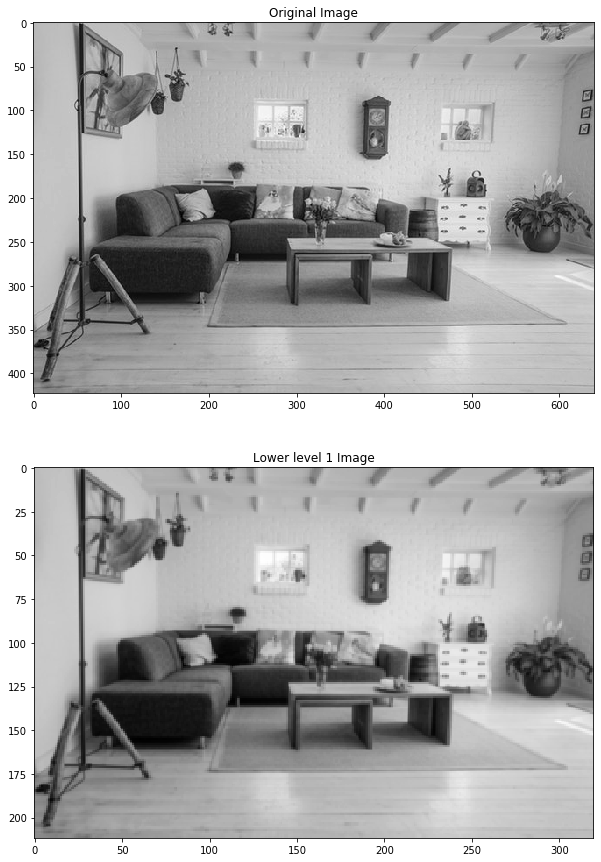

In [5]:
f = plt.figure(figsize=(15,15))
f.add_subplot(2, 1, 1).set_title('Original Image');
plt.imshow(img, cmap="gray")
f.add_subplot(2, 1, 2).set_title('Lower level 1 Image');
plt.imshow(lower_reso1, cmap="gray");
plt.show()

#Look at the scale next to the image, not the visible shape

### Resizing is the result of kernel stride 
 - Visualize - https://jhui.github.io/2017/03/16/CNN-Convolutional-neural-network/

Original Image shape            - (423, 640)
First Lower Pyramid Image shape - (212, 320)
 Restored Image shape           - (424, 640)


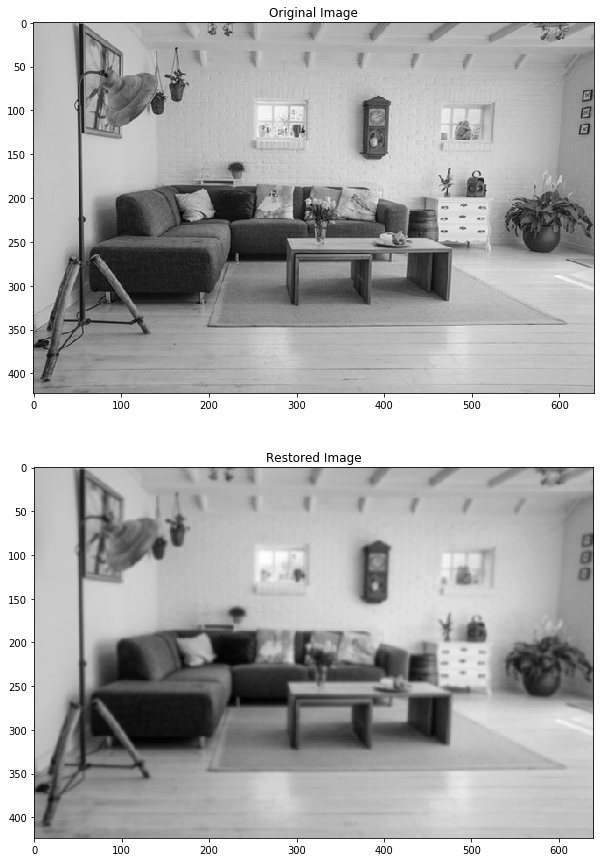

In [6]:
# Higher pyramids using OpenCV

%matplotlib inline
import numpy as np
import cv2
from matplotlib import pyplot as plt
img = cv2.imread("imgs/chapter8/indoor.jpg", 0);

print("Original Image shape            - {}".format(img.shape))

lower_reso1 = cv2.pyrDown(img)
print("First Lower Pyramid Image shape - {}".format(lower_reso1.shape))

restored_reso = cv2.pyrUp(lower_reso1)
print(" Restored Image shape           - {}".format(restored_reso.shape))

f = plt.figure(figsize=(15,15))
f.add_subplot(2, 1, 1).set_title('Original Image');
plt.imshow(img, cmap="gray")
f.add_subplot(2, 1, 2).set_title('Restored Image');
plt.imshow(restored_reso, cmap="gray");
plt.show()

In [7]:
# Gaussian Pyramid downscaling

%matplotlib inline
import numpy as np
import cv2
from matplotlib import pyplot as plt
A = cv2.imread("imgs/chapter8/sea.jpg", 1);
height, width, channel = A.shape;

gaussian_pyramid = [];

# First image in pyramid is the orginal one
gaussian_pyramid.append(A);


# Then for six times we apply pyramid down functions
for i in range(5):
    A = cv2.pyrDown(A)
    B = np.zeros((height, width, 3), dtype=np.uint8)
    B[:A.shape[0], :A.shape[1], :] = A[:, :, :]
    gaussian_pyramid.append(B)



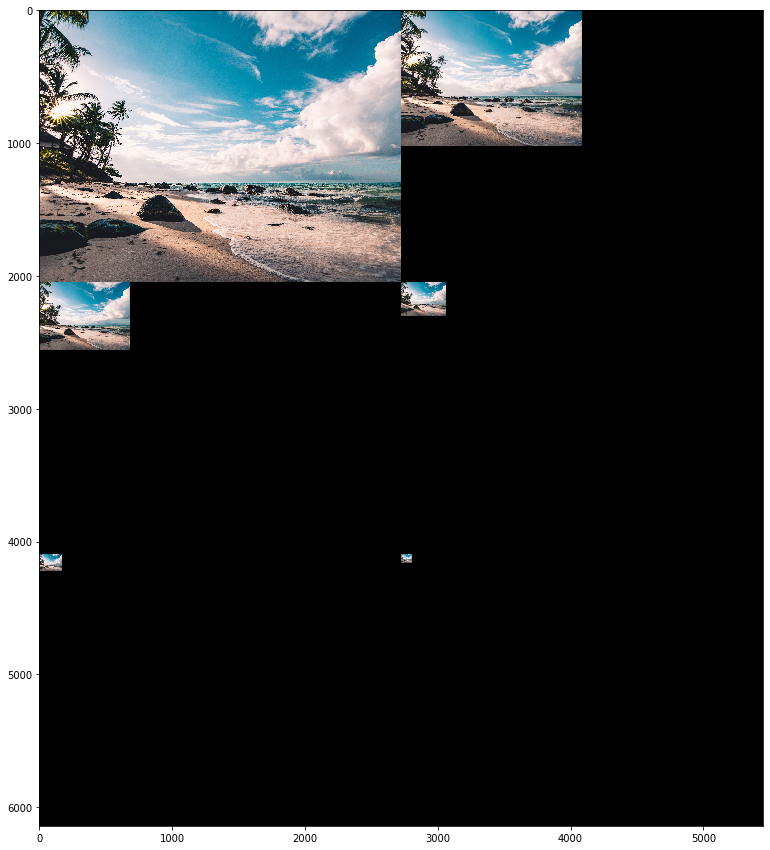

In [8]:
img1 = np.hstack((gaussian_pyramid[0], gaussian_pyramid[1]))
img2 = np.hstack((gaussian_pyramid[2], gaussian_pyramid[3]))
img3 = np.hstack((gaussian_pyramid[4], gaussian_pyramid[5]))

out = np.vstack((img1, img2, img3))

plt.figure(figsize=(15, 15))
plt.imshow(out[:,:,::-1])
plt.show()

(360, 640, 3) (360, 640, 3)


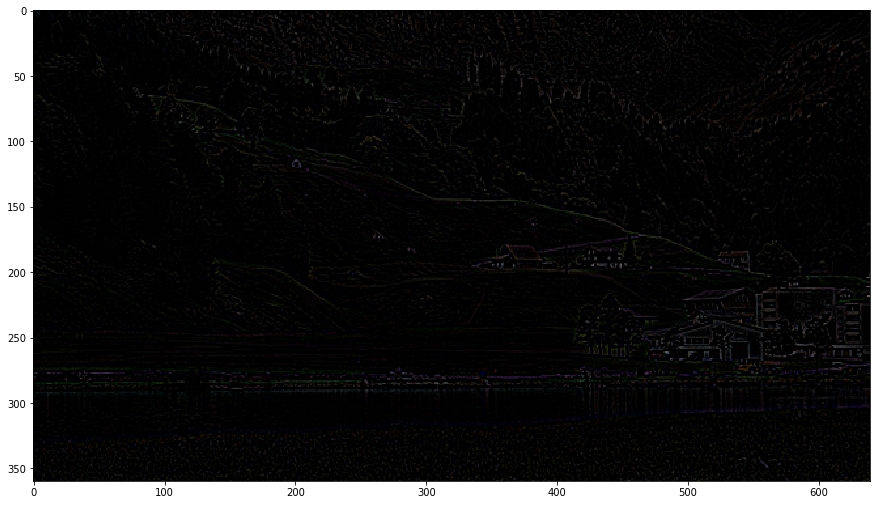

In [9]:
# Laplacian Pyramid upscaling

%matplotlib inline
import numpy as np
import cv2
from matplotlib import pyplot as plt
A = cv2.imread("imgs/chapter8/outdoor.jpg", 1);


down = cv2.pyrDown(A);
up = cv2.pyrUp(down);

print(A.shape, up.shape)
laplacian_up = cv2.subtract(A, up);

plt.figure(figsize=(15, 15))
plt.imshow(laplacian_up[:,:,::-1])
plt.show()

<a id='3'></a>
# Image blending using Pyramids
    - Continuous integration of images


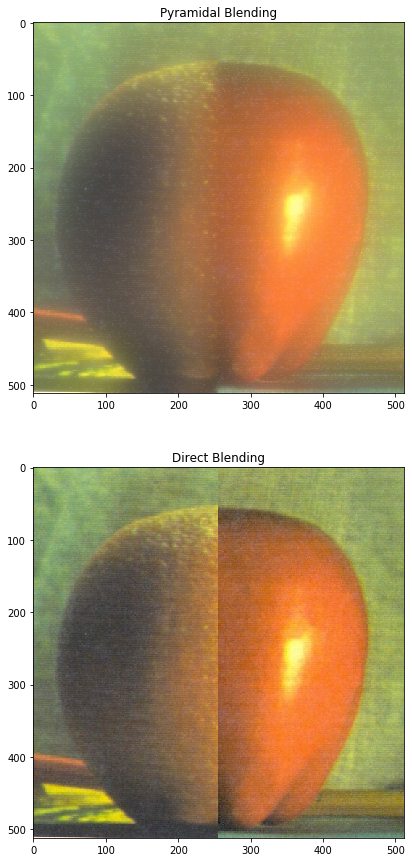

In [10]:
# Image credits: https://github.com/opencv/opencv/tree/master/samples/data

%matplotlib inline
import numpy as np
import cv2
from matplotlib import pyplot as plt
A = cv2.imread("imgs/chapter8/orange.jpg", 1);
B = cv2.imread("imgs/chapter8/apple.jpg", 1);


# generate Gaussian pyramid for A
G = A.copy()
gpA = [G]
for i in range(6):
    G = cv2.pyrDown(G)
    gpA.append(G)
    

# generate Gaussian pyramid for B
G = B.copy()
gpB = [G]
for i in range(6):
    G = cv2.pyrDown(G)
    gpB.append(G)


# generate Laplacian Pyramid for A
lpA = [gpA[5]]
for i in range(5,0,-1):
    GE = cv2.pyrUp(gpA[i])
    L = cv2.subtract(gpA[i-1],GE)
    lpA.append(L)
    
# generate Laplacian Pyramid for B
lpB = [gpB[5]]
for i in range(5,0,-1):
    GE = cv2.pyrUp(gpB[i])
    L = cv2.subtract(gpB[i-1],GE)
    lpB.append(L)
    

#Now add left and right halves of images in each level
LS = []
for la,lb in list(zip(lpA,lpB)):
    rows,cols,dpt = la.shape
    ls = np.hstack((la[:,0:cols//2], lb[:,cols//2:]))
    LS.append(ls)

# now reconstruct
ls_ = LS[0]
for i in range(1,6):
    ls_ = cv2.pyrUp(ls_)
    ls_ = cv2.add(ls_, LS[i])

# image with direct connecting each half
real = np.hstack((A[:,:cols//2],B[:,cols//2:]))
#cv2.imwrite('Pyramid_blending2.jpg',ls_)
#cv2.imwrite('Direct_blending.jpg',real)   

f = plt.figure(figsize=(15,15))
f.add_subplot(2, 1, 1).set_title('Pyramidal Blending');
plt.imshow(ls_[:, :,::-1])
f.add_subplot(2, 1, 2).set_title('Direct Blending');
plt.imshow(real[:, :,::-1]);
plt.show()

<a id='4'></a>
# Image compression

In [11]:
print("Use slider to change slides")
# Slide section 2
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets
from IPython.display import display
from PIL import Image


sl = widgets.IntSlider(value=8, min=8, max=9);

def f(slide_num):
    img_name = "imgs/chapter8/slide{}.jpg".format(slide_num);
    img = Image.open(img_name);
    
    display(img);

interact(f, slide_num=sl);

Use slider to change slides


interactive(children=(IntSlider(value=8, description='slide_num', max=9, min=8), Output()), _dom_classes=('wid…

### Run length encoding example

 - 1 row image
 - Input: 255; 255; 255..... for 10 colums; 0..... for 15 columns; 128.....100 columns; 255.... 5 colums;
 - Output: 255 10; 0 15; 128 100; 255 5